In [2]:
import pandas as pd
import numpy as np
import spacy

import re

import wrds
connection = wrds.Connection()


from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()

Loading library list...
Done


/var/folders/y3/v6fyb_rs72bcn7ftc3lvwvmw0000gn/T/ipykernel_7093/508751978.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook().pandas()


0it [00:00, ?it/s]

In [3]:
sql_string = """
                SELECT DISTINCT CAST(keydeveventtypeid AS INT), keydeveventtypename
                FROM ciq_keydev.ciqkeydeveventtype event
            """
event_mapping = connection.raw_sql(sql_string)
event_mapping.set_index('keydeveventtypeid', inplace=True)
event_mapping = event_mapping.to_dict()['keydeveventtypename']
# event_mapping

In [4]:
def get_date(x):
    response = None
    try:
        if '/' in x:
            response = pd.to_datetime(x, format='%m/%d/%Y').date()
        else:
            response = pd.to_datetime(f'{x[:4]}-{x[4:6]}-{x[6:8]}').date()
    except:
        response = np.nan
    return response

In [5]:
df = pd.read_csv('df_sentiment.csv',
                usecols =['keydevid','gvkey','keydeveventtypeid','announcedate','positive_sentiment_mean','negetive_sentiment_mean'],
                dtype = {'keydevid':'int64',
                        'gvkey':'int64',
                        'keydeveventtypeid':'int64',
                        'announcedate':'str',
                        'positive_sentiment_mean':'float64',
                        'negetive_sentiment_mean':'float64'}
                )
df

,keydevid,keydeveventtypeid,announcedate,gvkey,positive_sentiment_mean,negetive_sentiment_mean
0,2,3,20030423.0,29751,0.128500,0.0000
1,3,3,20020426.0,1581,0.022000,0.0000
2,4,3,20030131.0,1581,0.034000,0.0000
3,6,3,20030213.0,1976,0.081667,0.0000
4,7,3,20010425.0,7647,0.000000,0.0000
...,...,...,...,...,...,...
14349170,1771903948,87,20181219.0,111819,0.059200,0.0444
14349171,1771914944,83,20200331.0,20029,0.000000,0.0000
14349172,1771917145,83,20191031.0,20029,0.000000,0.0000
14349173,1771918080,87,20200527.0,16890,0.087500,0.0000


In [6]:
df.loc[1750810:1750815].announcedate.apply(lambda x: get_date(x))

1750810    2003-04-09
1750811    2000-04-06
1750812    2009-11-09
1750813    2006-01-01
1750814    2007-01-24
1750815    2006-01-02
Name: announcedate, dtype: object

In [7]:
df.announcedate = df.announcedate.progress_apply(lambda x: get_date(str(x)))
df

  0%|          | 0/14349175 [00:00<?, ?it/s]

,keydevid,keydeveventtypeid,announcedate,gvkey,positive_sentiment_mean,negetive_sentiment_mean
0,2,3,2003-04-23,29751,0.128500,0.0000
1,3,3,2002-04-26,1581,0.022000,0.0000
2,4,3,2003-01-31,1581,0.034000,0.0000
3,6,3,2003-02-13,1976,0.081667,0.0000
4,7,3,2001-04-25,7647,0.000000,0.0000
...,...,...,...,...,...,...
14349170,1771903948,87,2018-12-19,111819,0.059200,0.0444
14349171,1771914944,83,2020-03-31,20029,0.000000,0.0000
14349172,1771917145,83,2019-10-31,20029,0.000000,0.0000
14349173,1771918080,87,2020-05-27,16890,0.087500,0.0000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14349175 entries, 0 to 14349174
Data columns (total 6 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   keydevid                 int64  
 1   keydeveventtypeid        int64  
 2   announcedate             object 
 3   gvkey                    int64  
 4   positive_sentiment_mean  float64
 5   negetive_sentiment_mean  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 656.9+ MB


In [9]:
df.isna().sum()

keydevid                   0
keydeveventtypeid          0
announcedate               0
gvkey                      0
positive_sentiment_mean    0
negetive_sentiment_mean    0
dtype: int64

In [10]:
df['quarter'] = df.announcedate.progress_apply(lambda x: str(x.year)+'Q'+str(x.month%4+1))
df

  0%|          | 0/14349175 [00:00<?, ?it/s]

,keydevid,keydeveventtypeid,announcedate,gvkey,positive_sentiment_mean,negetive_sentiment_mean,quarter
0,2,3,2003-04-23,29751,0.128500,0.0000,2003Q1
1,3,3,2002-04-26,1581,0.022000,0.0000,2002Q1
2,4,3,2003-01-31,1581,0.034000,0.0000,2003Q2
3,6,3,2003-02-13,1976,0.081667,0.0000,2003Q3
4,7,3,2001-04-25,7647,0.000000,0.0000,2001Q1
...,...,...,...,...,...,...,...
14349170,1771903948,87,2018-12-19,111819,0.059200,0.0444,2018Q1
14349171,1771914944,83,2020-03-31,20029,0.000000,0.0000,2020Q4
14349172,1771917145,83,2019-10-31,20029,0.000000,0.0000,2019Q3
14349173,1771918080,87,2020-05-27,16890,0.087500,0.0000,2020Q2


<AxesSubplot:>

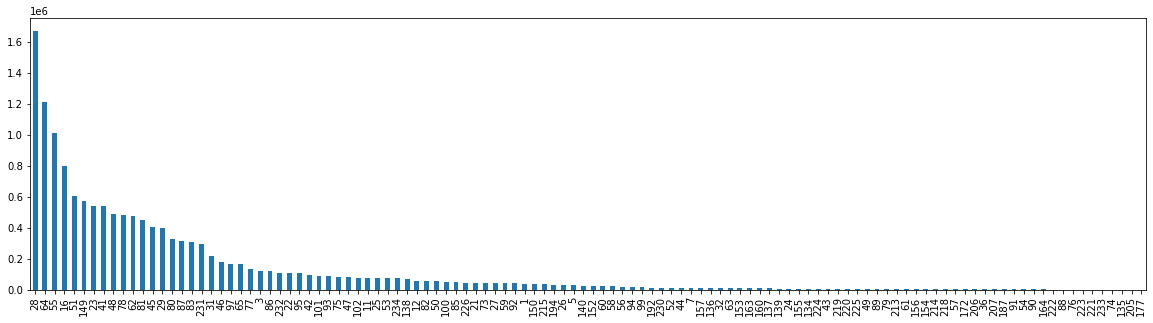

In [11]:
important_events = df.keydeveventtypeid.value_counts().sort_values(ascending=False)
important_events.plot(kind='bar', figsize = (20,5))

{16, 149, 23, 28, 29, 31, 41, 45, 46, 48, 51, 55, 62, 64, 78, 80, 81, 83, 87, 97, 231}


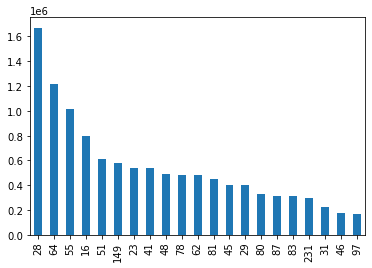

In [12]:
important_events = important_events[important_events > 0.1*important_events.iloc[0]]
important_events.plot(kind='bar')
important_events = set(important_events.index.tolist())
print(important_events)

In [13]:
df = df[df.keydeveventtypeid.apply(lambda x: (x in important_events))]

In [14]:
_ = df.groupby(['gvkey','quarter','keydeveventtypeid']).agg({'positive_sentiment_mean':'mean', 'negetive_sentiment_mean':'mean'}).unstack()

In [16]:
_.columns = _.columns.map(lambda x: '_'.join([x[0][:3], event_mapping[x[1]]])).str.strip('|')
_

pos_Executive/Board Changes - Other  pos_Client Announcements  \
gvkey  quarter                                                                  
1002   2001Q4                                0.0795                       NaN   
       2002Q2                                   NaN                  0.062500   
       2002Q3                                   NaN                  0.090167   
       2002Q4                                   NaN                  0.098889   
       2003Q1                                   NaN                  0.191600   
...                                             ...                       ...   
352435 2016Q4                                   NaN                       NaN   
       2017Q4                                   NaN                       NaN   
       2019Q4                                   NaN                  0.137200   
352441 2015Q4                                   NaN                       NaN   
352466 2020Q4                                   NaN                       NaN   

                pos_Announcements of Earnings  \
gvkey  quarter                                  
1002   2001Q4                             NaN   
       2002Q2                             NaN   
       2002Q3                             NaN   
       2002Q4                             NaN   
       2003Q1                             NaN   
...                                       ...   
352435 2016Q4                             NaN   
       2017Q4                             NaN   
       2019Q4                             NaN   
352441 2015Q4                             NaN   
352466 2020Q4                             NaN   

                pos_Corporate Guidance - New/Confirmed  \
gvkey  quarter                                           
1002   2001Q4                                      NaN   
       2002Q2                                      NaN   
       2002Q3                                      NaN   
       2002Q4                                      NaN   
       2003Q1                                      NaN   
...                                                ...   
352435 2016Q4                                      NaN   
       2017Q4                                      NaN   
       2019Q4                                      NaN   
352441 2015Q4                                      NaN   
352466 2020Q4                                      NaN   

                pos_Business Expansions  pos_Product-Related Announcements  \
gvkey  quarter                                                               
1002   2001Q4                       NaN                                NaN   
       2002Q2                       NaN                                NaN   
       2002Q3                       NaN                                NaN   
       2002Q4                       NaN                                NaN   
       2003Q1                       NaN                                NaN   
...                                 ...                                ...   
352435 2016Q4                       NaN                                NaN   
       2017Q4                       NaN                                NaN   
       2019Q4                       NaN                                NaN   
352441 2015Q4                       NaN                                NaN   
352466 2020Q4                       NaN                                NaN   

                pos_Dividend Affirmations  pos_Dividend Increases  \
gvkey  quarter                                                      
1002   2001Q4                         NaN                     NaN   
       2002Q2                         NaN                     NaN   
       2002Q3                         NaN                     NaN   
       2002Q4                         NaN                     NaN   
       2003Q1                         NaN                     NaN   
...                                   ...                     ...   
35

In [18]:
df = _.reset_index()

,gvkey,quarter,pos_Executive/Board Changes - Other,pos_Client Announcements,pos_Announcements of Earnings,pos_Corporate Guidance - New/Confirmed,pos_Business Expansions,pos_Product-Related Announcements,pos_Dividend Affirmations,pos_Dividend Increases,...,neg_Annual General Meeting,neg_Ex-Div Date (Regular),neg_Board Meeting,neg_M&A Transaction Announcements,neg_M&A Transaction Closings,neg_Private Placements,neg_Fixed Income Offerings,neg_Special/Extraordinary Shareholders Meeting,neg_Conferences,neg_Buyback Tranche Update
0,1002,2001Q4,0.0795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1002,2002Q2,NaN,0.062500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,2002Q3,NaN,0.090167,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1002,2002Q4,NaN,0.098889,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1002,2003Q1,NaN,0.191600,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785376,352435,2016Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
2785377,352435,2017Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2785378,352435,2019Q4,NaN,0.137200,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2785379,352441,2015Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [19]:
df.to_csv('df_sentiment_cleaned.csv', index=False)

# Fundamentals

In [20]:
fundamentals = pd.read_csv('fundamentals.csv').rename(columns={'GVKEY':'gvkey'})
fundamentals

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,curcdq,datacqtr,...,saleq,txdiq,txpq,txtq,uinvq,wcapq,xaccq,costat,gind,gsector
0,1004,08/31/2001,2001,1,INDL,C,D,STD,USD,2001Q3,...,202.993,NaN,0.762,0.162,NaN,367.707,NaN,A,201010.0,20.0
1,1004,11/30/2001,2001,2,INDL,C,D,STD,USD,2001Q4,...,144.889,NaN,NaN,-36.171,NaN,288.118,NaN,A,201010.0,20.0
2,1004,02/28/2002,2001,3,INDL,C,D,STD,USD,2002Q1,...,143.457,NaN,NaN,-1.520,NaN,320.824,NaN,A,201010.0,20.0
3,1004,05/31/2002,2001,4,INDL,C,D,STD,USD,2002Q2,...,147.382,-36.708,3.847,-1.761,NaN,286.192,NaN,A,201010.0,20.0
4,1004,08/31/2002,2002,1,INDL,C,D,STD,USD,2002Q3,...,151.165,NaN,1.737,-2.628,NaN,275.472,NaN,A,201010.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280605,339965,04/30/2021,2021,1,INDL,C,D,STD,USD,2021Q1,...,228.914,NaN,6.298,-0.251,NaN,3444.338,78.756,A,451020.0,45.0
280606,345920,12/31/2020,2020,4,INDL,C,D,STD,USD,2020Q4,...,87.442,0.052,0.000,0.192,NaN,151.217,21.025,A,201060.0,20.0
280607,345920,03/31/2021,2021,1,INDL,C,D,STD,USD,2021Q1,...,111.389,NaN,0.000,0.756,NaN,150.021,13.677,A,201060.0,20.0
280608,345980,12/31/2020,2020,4,INDL,C,D,STD,USD,2020Q4,...,794.000,-3.000,0.000,1.000,NaN,982.000,316.000,A,255020.0,25.0


In [21]:
fundamentals['quarter'] = fundamentals.progress_apply(lambda x: str(x['fyearq'])+'Q'+str(x['fqtr']), axis=1)

  0%|          | 0/280610 [00:00<?, ?it/s]

In [22]:
fundamentals

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,curcdq,datacqtr,...,txdiq,txpq,txtq,uinvq,wcapq,xaccq,costat,gind,gsector,quarter
0,1004,08/31/2001,2001,1,INDL,C,D,STD,USD,2001Q3,...,NaN,0.762,0.162,NaN,367.707,NaN,A,201010.0,20.0,2001Q1
1,1004,11/30/2001,2001,2,INDL,C,D,STD,USD,2001Q4,...,NaN,NaN,-36.171,NaN,288.118,NaN,A,201010.0,20.0,2001Q2
2,1004,02/28/2002,2001,3,INDL,C,D,STD,USD,2002Q1,...,NaN,NaN,-1.520,NaN,320.824,NaN,A,201010.0,20.0,2001Q3
3,1004,05/31/2002,2001,4,INDL,C,D,STD,USD,2002Q2,...,-36.708,3.847,-1.761,NaN,286.192,NaN,A,201010.0,20.0,2001Q4
4,1004,08/31/2002,2002,1,INDL,C,D,STD,USD,2002Q3,...,NaN,1.737,-2.628,NaN,275.472,NaN,A,201010.0,20.0,2002Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280605,339965,04/30/2021,2021,1,INDL,C,D,STD,USD,2021Q1,...,NaN,6.298,-0.251,NaN,3444.338,78.756,A,451020.0,45.0,2021Q1
280606,345920,12/31/2020,2020,4,INDL,C,D,STD,USD,2020Q4,...,0.052,0.000,0.192,NaN,151.217,21.025,A,201060.0,20.0,2020Q4
280607,345920,03/31/2021,2021,1,INDL,C,D,STD,USD,2021Q1,...,NaN,0.000,0.756,NaN,150.021,13.677,A,201060.0,20.0,2021Q1
280608,345980,12/31/2020,2020,4,INDL,C,D,STD,USD,2020Q4,...,-3.000,0.000,1.000,NaN,982.000,316.000,A,255020.0,25.0,2020Q4


In [23]:
combined_df = pd.merge(fundamentals, df, on=['gvkey','quarter'])
combined_df

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,curcdq,datacqtr,...,neg_Annual General Meeting,neg_Ex-Div Date (Regular),neg_Board Meeting,neg_M&A Transaction Announcements,neg_M&A Transaction Closings,neg_Private Placements,neg_Fixed Income Offerings,neg_Special/Extraordinary Shareholders Meeting,neg_Conferences,neg_Buyback Tranche Update
0,1004,08/31/2001,2001,1,INDL,C,D,STD,USD,2001Q3,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1004,11/30/2001,2001,2,INDL,C,D,STD,USD,2001Q4,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1004,02/28/2002,2001,3,INDL,C,D,STD,USD,2002Q1,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1004,05/31/2002,2001,4,INDL,C,D,STD,USD,2002Q2,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004,08/31/2002,2002,1,INDL,C,D,STD,USD,2002Q3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262372,332115,12/31/2020,2020,4,INDL,C,D,STD,USD,2020Q4,...,NaN,NaN,NaN,NaN,NaN,0.027125,NaN,0.0,0.0,NaN
262373,335466,03/31/2020,2020,1,INDL,C,D,STD,USD,2020Q1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262374,339965,10/31/2020,2020,3,INDL,C,D,STD,USD,2020Q3,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.0,NaN
262375,339965,01/31/2021,2020,4,INDL,C,D,STD,USD,2020Q4,...,NaN,NaN,NaN,NaN,0.010375,NaN,NaN,NaN,0.0,NaN


In [24]:
combined_df.to_csv('combined_df.csv', index=False)

In [25]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262377 entries, 0 to 262376
Data columns (total 86 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   gvkey                                           262377 non-null  int64  
 1   datadate                                        262377 non-null  object 
 2   fyearq                                          262377 non-null  int64  
 3   fqtr                                            262377 non-null  int64  
 4   indfmt                                          262377 non-null  object 
 5   consol                                          262377 non-null  object 
 6   popsrc                                          262377 non-null  object 
 7   datafmt                                         262377 non-null  object 
 8   curcdq                                          262377 non-null  object 
 9   datacqtr                  

In [29]:
print(df.__sizeof__()//1000000)
print(fundamentals.__sizeof__()//1000000)
print(combined_df.__sizeof__()//1000000)

1133
261
334
